### Importing all the necessary libraries :

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task - 1:
Import your dataset from Assignment-1.

In [121]:
file_path = 'selected_features.csv'
selected_features = pd.read_csv(file_path)
print(selected_features.head())

   latitude  longitude    gap   nst   mag   depth
0   52.0999   178.5218  139.0  14.0  3.10  82.770
1    7.1397   126.7380  104.0  32.0  4.50  79.194
2   19.1631   -66.5251  246.0  23.0  3.93  24.000
3   -4.7803   102.7675  187.0  17.0  4.30  63.787
4   53.3965  -166.9417  190.0  19.0  3.00  10.000


# Task - 2:
Examine the data's metadata, including the number of rows and columns (size), data 
types (e.g., numerical, categorical), and feature ranges.

In [122]:
num_rows, num_columns = selected_features.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

print("\nData types:")
print(selected_features.dtypes)

print("\nFeature ranges:")
print(selected_features.describe())

print("\nUnique values in each column of selected features Data Frame :")
print(selected_features.nunique())

Number of rows: 26642
Number of columns: 6

Data types:
latitude     float64
longitude    float64
gap          float64
nst          float64
mag          float64
depth        float64
dtype: object

Feature ranges:
           latitude     longitude           gap           nst           mag  \
count  26642.000000  26642.000000  25225.000000  25227.000000  26642.000000   
mean      16.852798    -11.487497    124.930971     42.571332      4.007395   
std       30.389200    130.053399     67.430145     37.662352      0.794423   
min      -65.849700   -179.998700      8.000000      0.000000      2.600000   
25%       -6.415275   -149.608650     73.000000     19.000000      3.220000   
50%       18.884167    -64.811833    111.000000     30.000000      4.300000   
75%       41.827950    126.965100    165.000000     52.000000      4.500000   
max       86.593900    179.999400    350.000000    423.000000      7.800000   

              depth  
count  26642.000000  
mean      67.491224  
std      

# Task - 3:
Identify and address missing values in the dataset. You can choose to impute missing 
values, remove rows with missing data, or implement a strategy based on the specific 
data points

## Plot before removing Null values from dataset :

### First finding the number of null values present in each feature :

In [123]:
null_counts = selected_features.isnull().sum()
print("Number of null values in each feature:")
print(null_counts)

Number of null values in each feature:
latitude        0
longitude       0
gap          1417
nst          1415
mag             0
depth           0
dtype: int64


### Plotting each feature distribution:

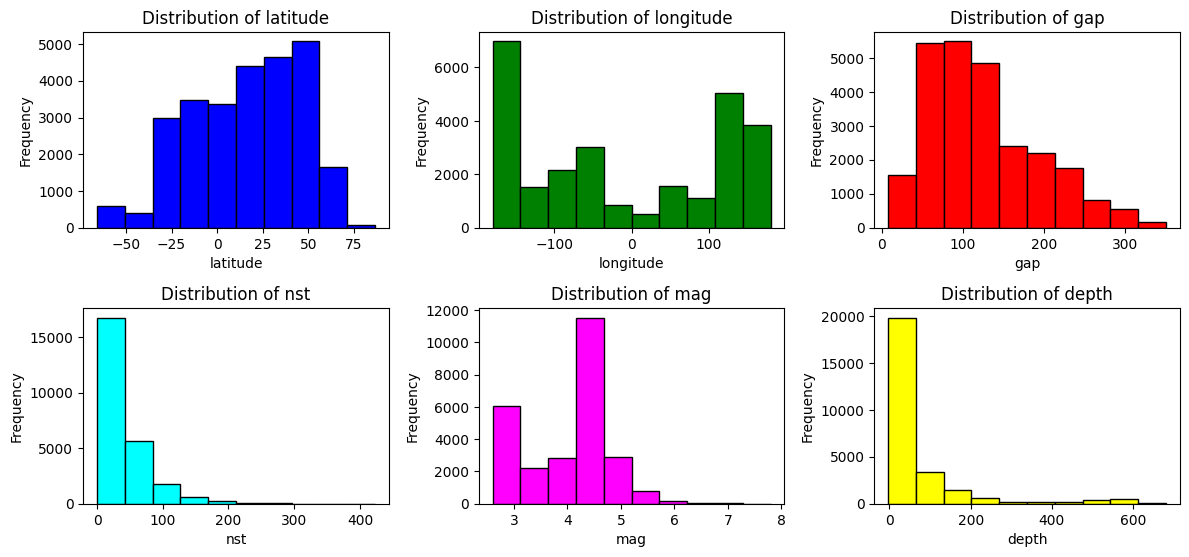

In [124]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'orange', 'purple']

# Plot all features in one graph
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(selected_features.columns, colors)):
    plt.subplot(3, 3, i + 1)
    selected_features[column].hist(color=color, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)

plt.tight_layout()
plt.show()

### Plot of null values present in each feature:

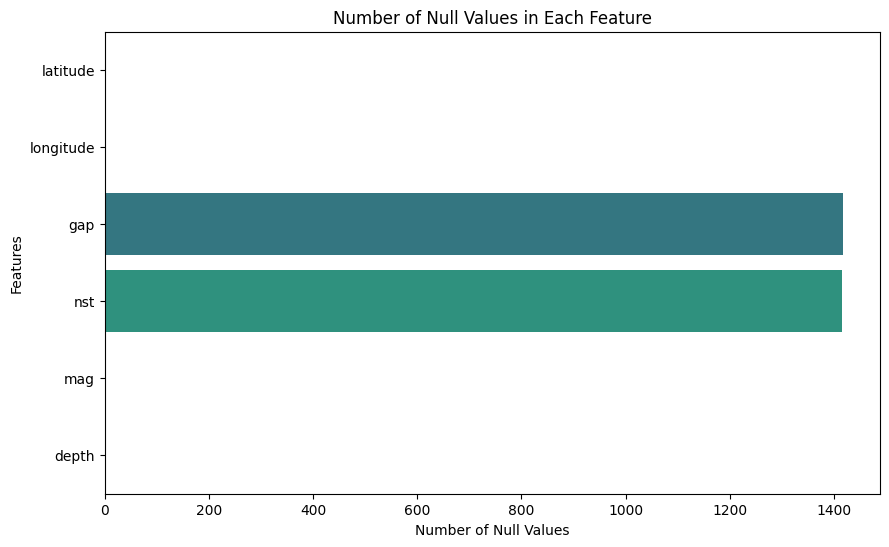

In [125]:
null_counts = selected_features.isnull().sum()

# Plot null values in each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.values, y=null_counts.index, hue=null_counts.index, palette='viridis', legend=False)
plt.title('Number of Null Values in Each Feature')
plt.xlabel('Number of Null Values')
plt.ylabel('Features')
plt.show()

## Plot after removing Null values from dataset :

### Code for removing null values:

In [126]:

def handle_missing_values(selected_features):
    print("Choose how you want to handle missing values:")
    print("1. Impute missing values (replace NaNs with mean or median)")
    print("2. Remove rows with missing data")
    print("3. Replace missing values with a constant value")

    while True:
        try:
            choice = int(input("Enter your choice (1/2/3): "))
            if choice in [1, 2, 3]:
                break
            else:
                print("Invalid choice. Please enter a valid option (1/2/3).")
        except ValueError:
            print("Invalid input. Please enter a valid option (1/2/3).")

    if choice == 1:
        method = input("Choose imputation method (mean/median): ").lower()
        if method == 'mean':
            selected_features = selected_features.fillna(
                selected_features.mean())
            print(" **** Null Values are replaced with the mean ! *** ")
        elif method == 'median':
            selected_features = selected_features.fillna(
                selected_features.median())
            print("*** Null Values are replaced with the median ! ***")

        else:
            print("Invalid method. No changes made.")

    elif choice == 2:
        original_shape = selected_features.shape
        selected_features.dropna(inplace=True)
        if selected_features.shape == original_shape:
            print("No rows were removed.")
        else:
            print("Rows with missing data were removed.")

    elif choice == 3:
        constant_value = input(
            "Enter the constant value to replace missing values with: ")
        selected_features.fillna(constant_value, inplace=True)
        print("Missing values replaced with the constant value:", constant_value)

    return selected_features


file_path = 'selected_features.csv'
selected_features = pd.read_csv(file_path)

# Call the function to handle missing values
selected_features_before = selected_features.copy()
selected_features = handle_missing_values(selected_features)

# Check if any changes were made
if selected_features.equals(selected_features_before):
    print("No changes were made to the dataset.")
    print(" ** Try Again ! **")
    selected_features = handle_missing_values(selected_features)

else:
    # Check missing values after handling
    missing_values_after = selected_features.isnull().sum()
    print("\nMissing values after handling:\n", missing_values_after)

    # Save the cleaned dataset to a new file
    print("\n** New cleaned Dataset saved successfully **")
    selected_features.to_csv('selected_features_cleaned.csv', index=False)

Choose how you want to handle missing values:
1. Impute missing values (replace NaNs with mean or median)
2. Remove rows with missing data
3. Replace missing values with a constant value


 **** Null Values are replaced with the mean ! *** 

Missing values after handling:
 latitude     0
longitude    0
gap          0
nst          0
mag          0
depth        0
dtype: int64

** New cleaned Dataset saved successfully **


### Plotting each feature distribution after cleaning:

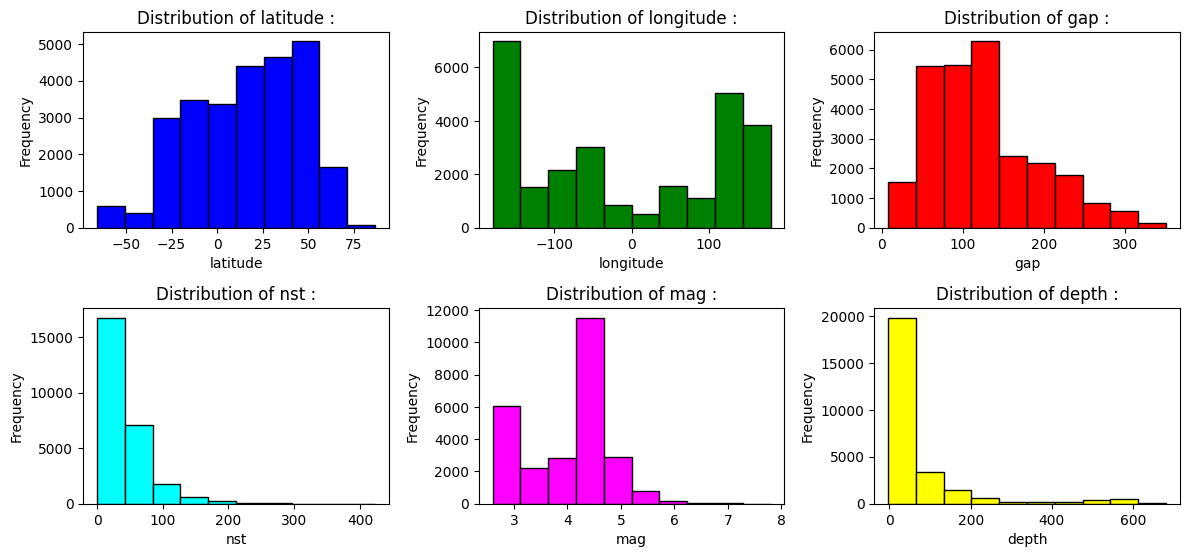

In [127]:
selected_features_cleaned = pd.read_csv('selected_features_cleaned.csv')


colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'orange', 'purple']

# Plot all features in one graph , now of the new cleaned dataset
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(selected_features_cleaned.columns, colors)):
    plt.subplot(3, 3, i + 1)
    selected_features_cleaned[column].hist(color=color, edgecolor='black')
    plt.title(f'Distribution of {column} :')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)

plt.tight_layout()
plt.show()

### Plot of null values present in each feature:

### Note:
#### As all the nullvalues are removed so our plot will be empty.


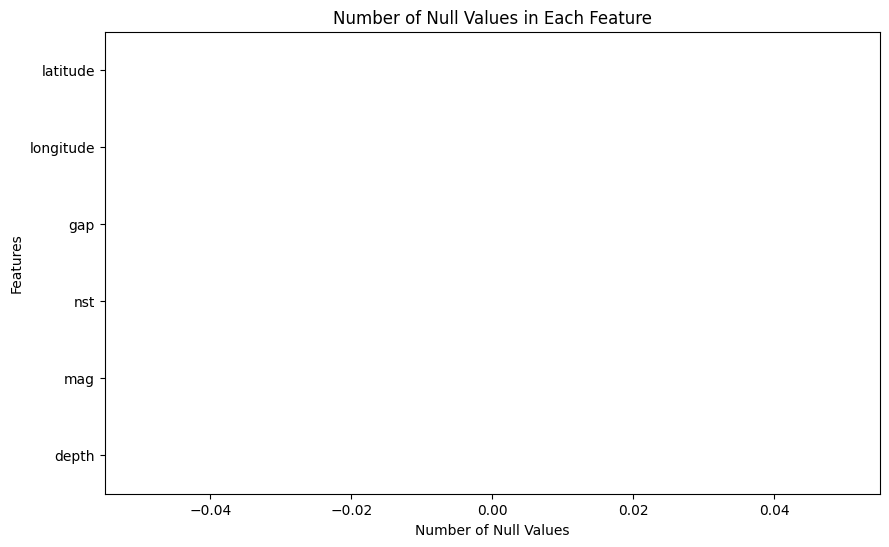

In [128]:
null_counts = selected_features_cleaned.isnull().sum()

# Plot null values in each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.values, y=null_counts.index,
            hue=null_counts.index, palette='viridis', legend=False)
plt.title('Number of Null Values in Each Feature')
plt.xlabel('Number of Null Values')
plt.ylabel('Features')
plt.show()

# Task - 4:
Check for outliers in the data and identify and remove any irrelevant or duplicate data 
points.


### Code for checking outliers ,duplicate values & removing it :

In [129]:
# if the scipy module is not installed try running following command:

#!pip install scipy

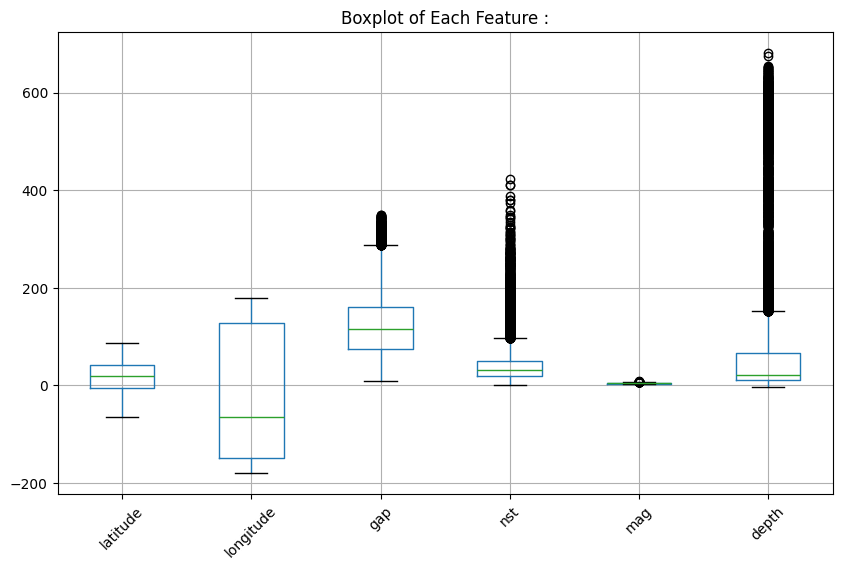

Data shape after removing outliers: (23050, 6)
Data shape after removing duplicates: (24682, 6)


In [130]:
from scipy.stats import zscore
import pandas as pd

plt.figure(figsize=(10, 6))
selected_features_cleaned.boxplot()
plt.title('Boxplot of Each Feature :')
plt.xticks(rotation=45)
plt.show()


z_scores = zscore(selected_features_cleaned.select_dtypes(include='number'))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_without_outliers = selected_features[filtered_entries]

# Remove duplicate rows from data_without_outliers
data_without_outliers = data_without_outliers.drop_duplicates()

# Remove duplicate rows from selected_features
drop_dupli = selected_features_cleaned.drop_duplicates()

print("Data shape after removing outliers:", data_without_outliers.shape)
print("Data shape after removing duplicates:", drop_dupli.shape)



# Saving the data in the separate datasets.
data_without_outliers.to_csv('cleaned_data_without_outliers.csv', index=False)
drop_dupli.to_csv('cleaned_data_without_duplicates.csv')


### Comparison of count of different dataframes made on removing the Outliers , Duplicates values in it :

The below code will give us plot which infact show the difference occured in the dataset  by removing the Outliers , Duplicates values from it.

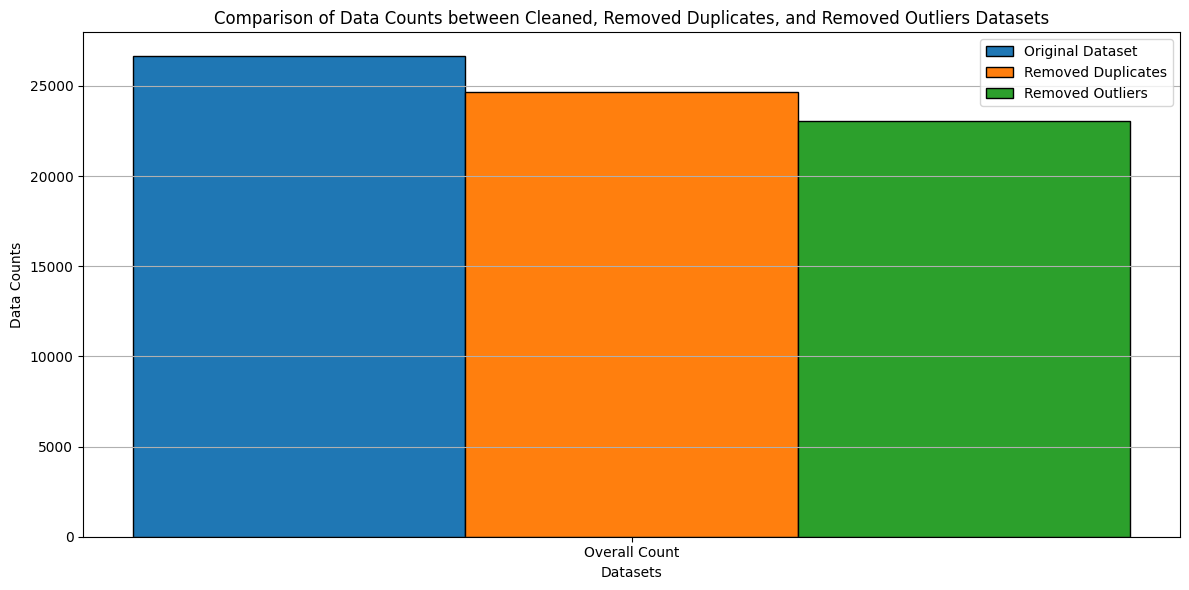

In [135]:

original_df = pd.read_csv('selected_features_cleaned.csv')
drop_dupli = pd.read_csv('cleaned_data_without_duplicates.csv')
data_without_outliers = pd.read_csv('cleaned_data_without_outliers.csv')

original_counts = original_df.shape[0]
modified_counts = drop_dupli.shape[0]
additional_counts = data_without_outliers.shape[0]

# Define colors for each dataset
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot side by side
plt.figure(figsize=(12, 6))

bar_width = 0.2

index = np.arange(1)  # Only one bar needed for overall count

# Plot original dataset bar
plt.bar(index - bar_width, original_counts, width=bar_width,
        color=colors[0], edgecolor='black', label='Original Dataset')

# Plot modified dataset bars
plt.bar(index, modified_counts, width=bar_width,
        color=colors[1], edgecolor='black', label='Removed Duplicates')

# Plot additional dataset bars
plt.bar(index + bar_width, additional_counts, width=bar_width,
        color=colors[2], edgecolor='black', label='Removed Outliers')

plt.title('Comparison of Data Counts between Cleaned, Removed Duplicates, and Removed Outliers Datasets')
plt.xlabel('Datasets')
plt.ylabel('Data Counts')
plt.xticks(index, ['Overall Count'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Task - 5:

After cleaning, perform basic descriptive statistics on the clean data.

### Note:
Now, as the cleaning of the dataset is being done , so for performing the descriptive statistics on cleaned data , I will use the python "describe()" function

In [136]:
clean_data = pd.read_csv("cleaned_data_without_outliers.csv")

statistics = clean_data.describe()

print("After Cleaning (removing null and duplicate values) the detailed sttaistics are : \n ")
print(statistics)

After Cleaning (removing null and duplicate values) the detailed sttaistics are : 
 
           latitude     longitude           gap           nst           mag  \
count  23050.000000  23050.000000  23050.000000  23050.000000  23050.000000   
mean      19.412311    -14.178446    129.238573     38.784686      3.922574   
std       30.075902    128.244786     65.670892     27.864583      0.794901   
min      -65.849700   -179.998700     11.000000      0.000000      2.600000   
25%       -4.178850   -148.807650     78.000000     19.000000      3.100000   
50%       19.457917    -65.831083    121.000000     30.000000      4.200000   
75%       45.092675    126.805900    170.000000     47.000000      4.500000   
max       86.593900    179.999400    321.000000    152.000000      6.300000   

              depth  
count  23050.000000  
mean      46.385016  
std       61.387128  
min       -3.370000  
25%       10.000000  
50%       17.938500  
75%       57.178500  
max      417.054000  


## Co-relation of Cleaned dataset:

#### Co-relation Matrix:

In [137]:
correlation_matrix = clean_data.corr()
print(correlation_matrix)

           latitude  longitude       gap       nst       mag     depth
latitude   1.000000  -0.298189  0.265479  0.018442 -0.589075 -0.161121
longitude -0.298189   1.000000 -0.298921  0.148615  0.575628  0.089651
gap        0.265479  -0.298921  1.000000 -0.492108 -0.457762 -0.104735
nst        0.018442   0.148615 -0.492108  1.000000  0.431807  0.037762
mag       -0.589075   0.575628 -0.457762  0.431807  1.000000  0.125464
depth     -0.161121   0.089651 -0.104735  0.037762  0.125464  1.000000


#### Plotting it using a seaborn library "Boxplot" : 

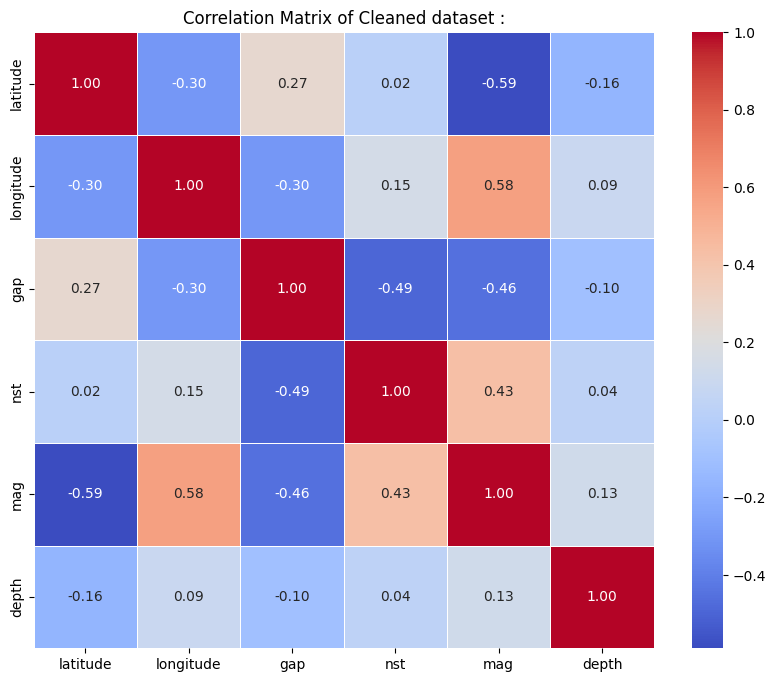

In [138]:
correlation_matrix = clean_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of Cleaned dataset :')
plt.show()

The above plot clearly shows the correlation of each feature with other respective feature in the dataset.

# Task - 6:
Compare data sets before and after cleaning using data visualization techniques.

## Plot before performing cleaning on the dataset :

### Plotting each feature distribution:

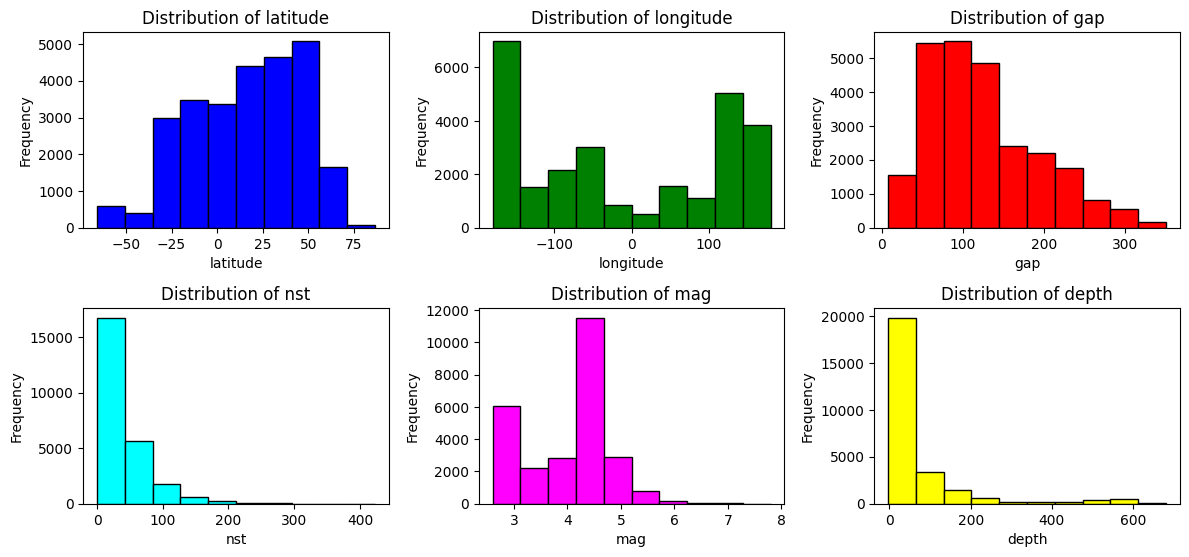

In [139]:
uncleaned_data =  pd.read_csv("selected_features.csv")

colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'orange', 'purple']

# Plot all features in one graph
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(uncleaned_data.columns, colors)):
    plt.subplot(3, 3, i + 1)
    uncleaned_data[column].hist(color=color, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)

plt.tight_layout()
plt.show()

### Plot of null values present in each feature:

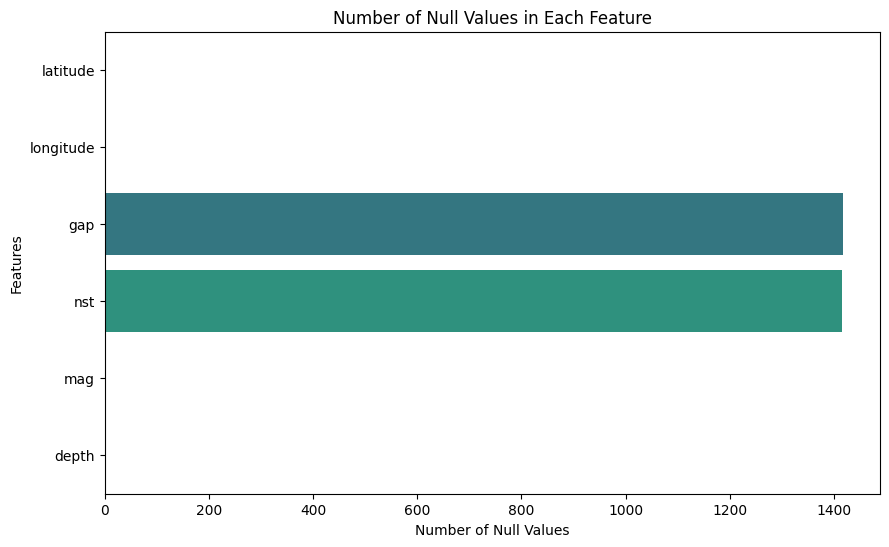

In [140]:

null_counts = uncleaned_data.isnull().sum()

# Plot null values in each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.values, y=null_counts.index, hue=null_counts.index, palette='viridis', legend=False)
plt.title('Number of Null Values in Each Feature')
plt.xlabel('Number of Null Values')
plt.ylabel('Features')
plt.show()

### Plot of Duplicate values present in the dataset:

1960


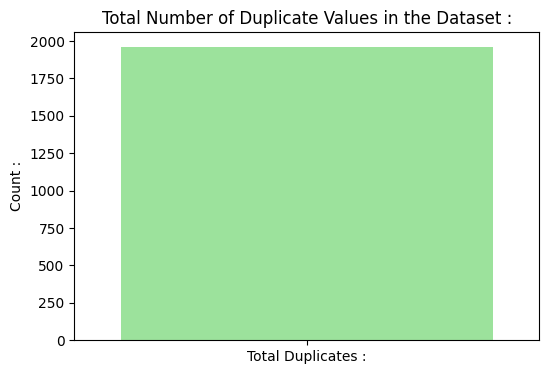

In [141]:
total_duplicate_count = uncleaned_data.duplicated().sum()
print(total_duplicate_count)
custom_palette = sns.color_palette(["lightgreen"])

plt.figure(figsize=(6, 4))
sns.barplot(x=["Total Duplicates :"], y=[total_duplicate_count], palette=custom_palette, hue=["Total Duplicates"], legend=False)
plt.title('Total Number of Duplicate Values in the Dataset :')
plt.ylabel('Count :')
plt.show()

### Plot of Outliers present in the dataset:

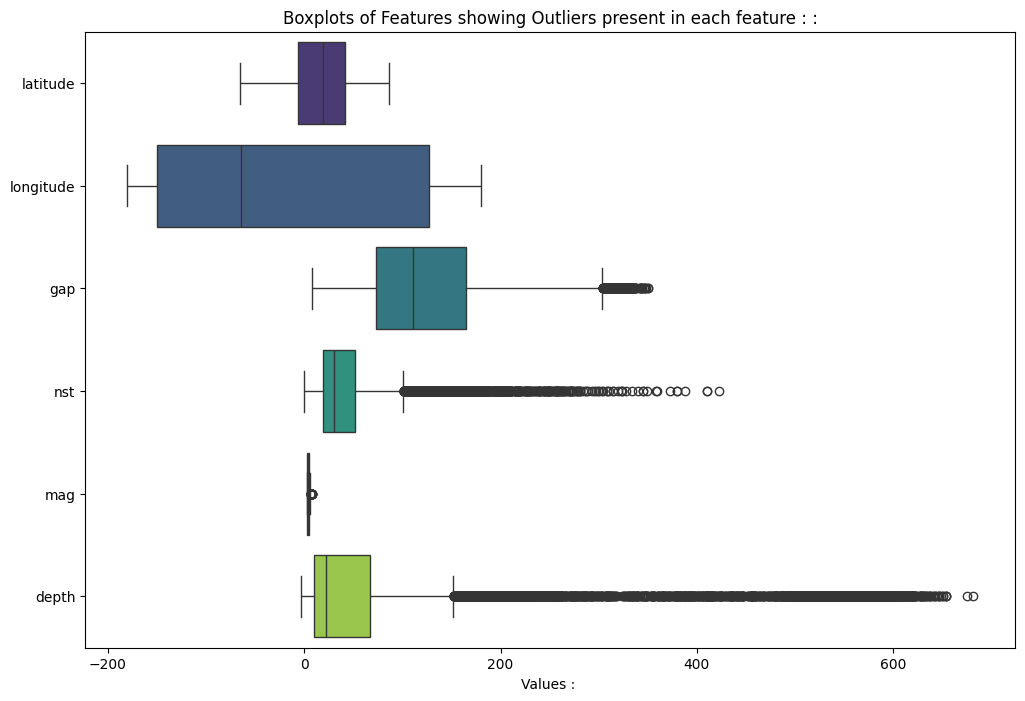

In [142]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=uncleaned_data, orient='h', palette='viridis')
plt.title('Boxplots of Features showing Outliers present in each feature : :')
plt.xlabel('Values : ')
plt.show()


## Plot after performing cleaning on dataset :

### Plotting each feature distribution:

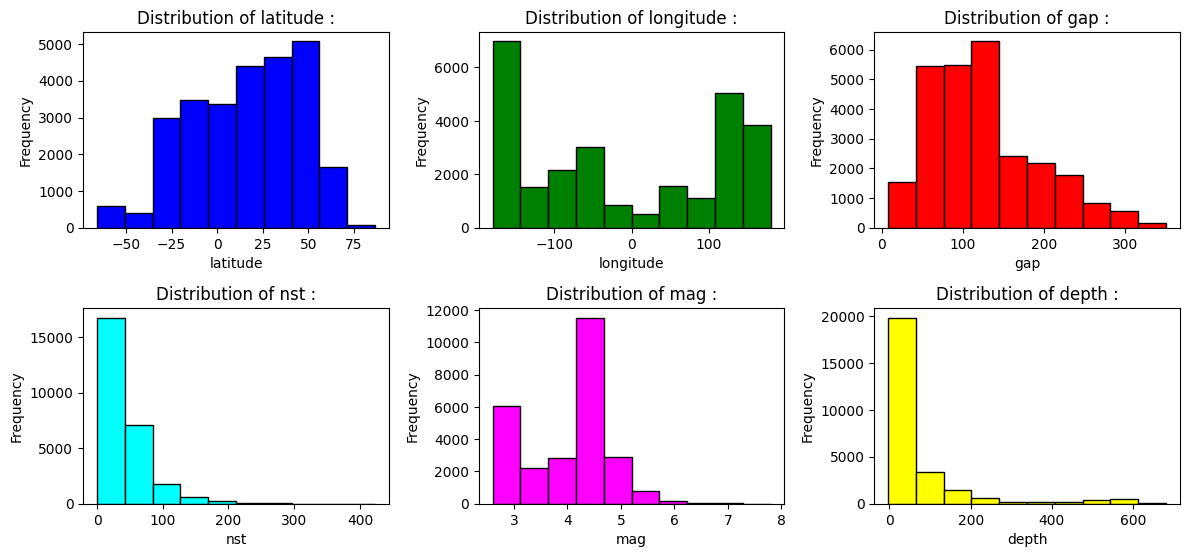

In [144]:
cleaned_data = pd.read_csv("cleaned_data_without_outliers.csv")



colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'orange', 'purple']

# Plot all features in one graph , now of the new cleaned dataset
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(cleaned_data.columns, colors)):
    plt.subplot(3, 3, i + 1)
    selected_features_cleaned[column].hist(color=color, edgecolor='black')
    plt.title(f'Distribution of {column} :')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)

plt.tight_layout()
plt.show()

### Plot of null values present in each feature:

### Note:
#### As all the nullvalues are removed so our plot will be empty.

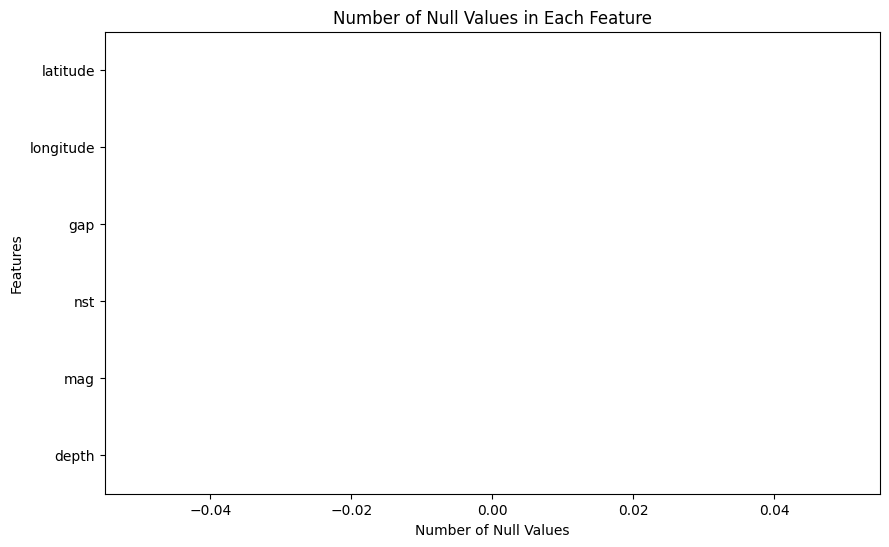

In [145]:
null_counts = cleaned_data.isnull().sum()

# Plot null values in each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.values, y=null_counts.index,
            hue=null_counts.index, palette='viridis', legend=False)
plt.title('Number of Null Values in Each Feature')
plt.xlabel('Number of Null Values')
plt.ylabel('Features')
plt.show()

### Plot of Duplicate values after cleaning dataset:

Note: In the cleaning process we have deleted all the duplicate values so our plot will be empty 

0


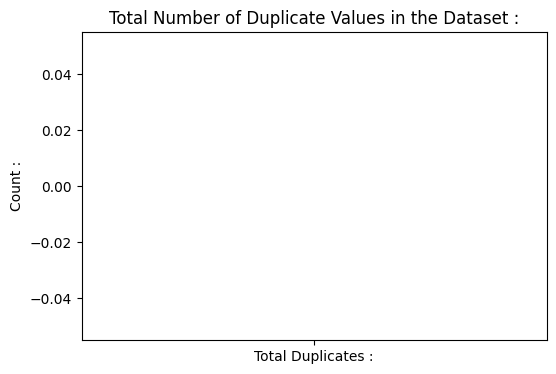

In [148]:

total_duplicate = cleaned_data.duplicated().sum()
print(total_duplicate)

custom_palette = sns.color_palette(["lightgreen"])

plt.figure(figsize=(6, 4))

sns.barplot(x=["Total Duplicates :"], y=[total_duplicate], palette=custom_palette, hue=["Total Duplicates"], legend=False)
plt.title('Total Number of Duplicate Values in the Dataset :')
plt.ylabel('Count :')
plt.show()

### Plot of Outliers after cleaning dataset:


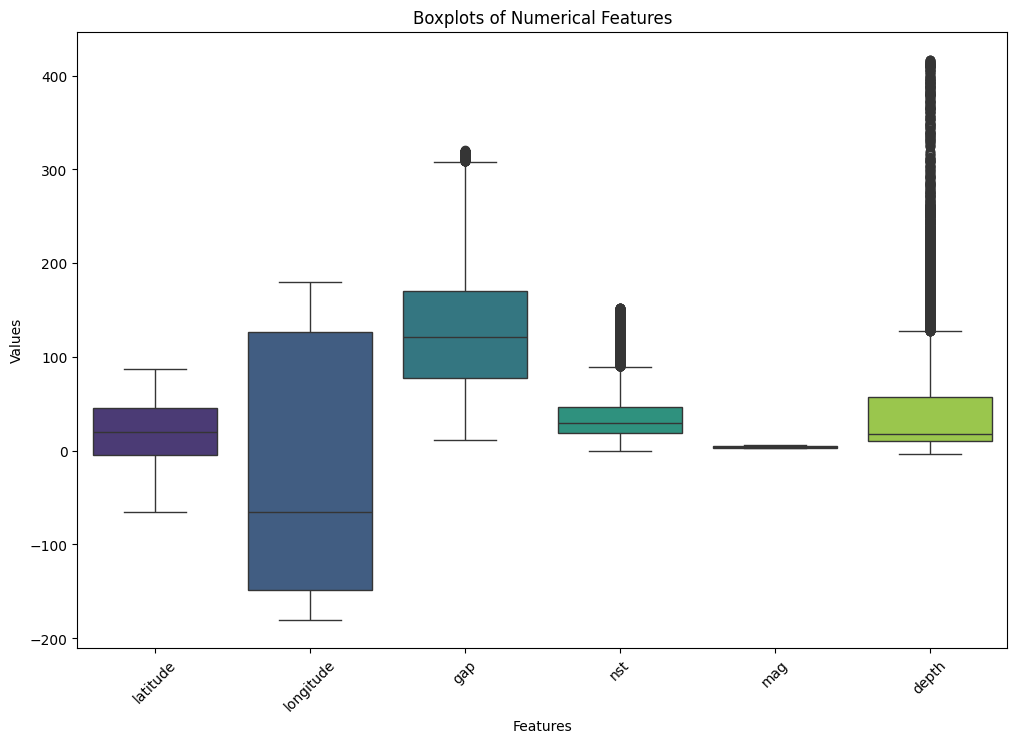

In [149]:

# Load the dataset into a DataFrame
file_path = 'cleaned_data_without_outliers.csv'  # Update with the actual file path
cleaned_data = pd.read_csv(file_path)

# Check if the dataset contains numerical features
numerical_features = cleaned_data.select_dtypes(include=['int64', 'float64'])

# Verify that the dataset is not empty
if numerical_features.empty:
    print("No numerical features found in the dataset. Unable to create boxplot.")
else:
    # Plot boxplots for numerical features
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=numerical_features, palette='viridis')
    plt.title('Boxplots of Numerical Features')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()


### Above graph clearly shows that cleaning outliers have produced significant impact in dataset 


                                                   ************************************************ End !  *************************************************************